# Imports

In [1]:
%matplotlib inline
import json
import tensorflow as tf
import pandas as pd 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# Load data

In [3]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

sentences = df['headline']
labels = df['is_sarcastic']

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Model Training

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6449 - accuracy: 0.6366 - val_loss: 0.4979 - val_accuracy: 0.8043
Epoch 2/30
625/625 - 2s - loss: 0.3906 - accuracy: 0.8406 - val_loss: 0.3596 - val_accuracy: 0.8463
Epoch 3/30
625/625 - 2s - loss: 0.2971 - accuracy: 0.8810 - val_loss: 0.3492 - val_accuracy: 0.8439
Epoch 4/30
625/625 - 2s - loss: 0.2477 - accuracy: 0.9044 - val_loss: 0.3305 - val_accuracy: 0.8582
Epoch 5/30
625/625 - 2s - loss: 0.2134 - accuracy: 0.9182 - val_loss: 0.3327 - val_accuracy: 0.8568
Epoch 6/30
625/625 - 2s - loss: 0.1874 - accuracy: 0.9301 - val_loss: 0.3444 - val_accuracy: 0.8537
Epoch 7/30
625/625 - 2s - loss: 0.1674 - accuracy: 0.9387 - val_loss: 0.3709 - val_accuracy: 0.8460
Epoch 8/30
625/625 - 2s - loss: 0.1480 - accuracy: 0.9468 - val_loss: 0.3787 - val_accuracy: 0.8462
Epoch 9/30
625/625 - 2s - loss: 0.1346 - accuracy: 0.9525 - val_loss: 0.3992 - val_accuracy: 0.8446
Epoch 10/30
625/625 - 2s - loss: 0.1219 - accuracy: 0.9567 - val_loss: 0.4220 - val_accuracy: 0.8397

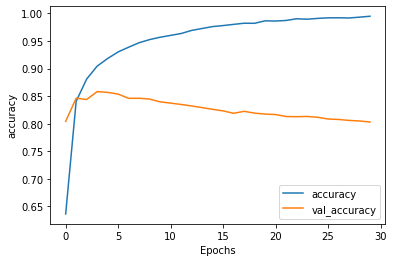

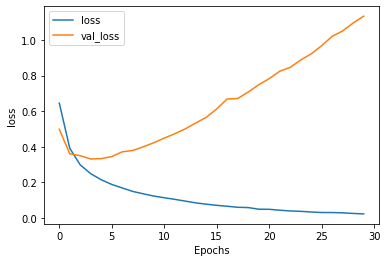

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

<OOV> scientists unveil doomsday clock of hair loss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
eat your veggies: 9 deliciously different recipes
0


In [12]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[5.0574261e-01]
 [1.6978382e-06]]
